<a href="https://colab.research.google.com/github/rasyidabdi/MachineLearningTask/blob/main/Week6/Rasyid%20Abdi_1103204127_K-Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Rasyid Abdi Gantoro

Nim : 1103204127

Link Chat-GPT : https://chat.openai.com/share/b721250b-29a7-4be5-a556-1a59533373c3

Beri Kode untuk menghubungkan google collab dengan drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset file in Google Drive
file_path = '/content/drive/My Drive/DATASET/Mall_Customers.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**PREPROCSESING**

Prompt : RangeIndex: 200 entries, 0 to 199

Data columns (total 5 columns):

Column Non-Null Count Dtype

0 CustomerID 200 non-null int64

1 Genre 200 non-null object

2 Age 200 non-null int64

3 Annual Income (k$) 200 non-null int64

4 Spending Score (1-100) 200 non-null int64

beri kode untuk drop fitur CustomerID



In [6]:
# Drop fitur CustomerID
df = df.drop('CustomerID', axis=1)

# Menampilkan lima baris pertama dari DataFrame setelah fitur CustomerID dihapus
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None


Prompt : beri kode untuk mengubah fitur Genre menjadi Gender



In [7]:
# Mengubah nama fitur Genre menjadi Gender
df = df.rename(columns={'Genre': 'Gender'})

# Menampilkan lima baris pertama dari DataFrame setelah fitur Genre diubah menjadi Gender
print(df.head())

df

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


**MODELING**

Prompt : beri kode untuk memilih jumlah cluster terbaik menggunakan elbow method



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

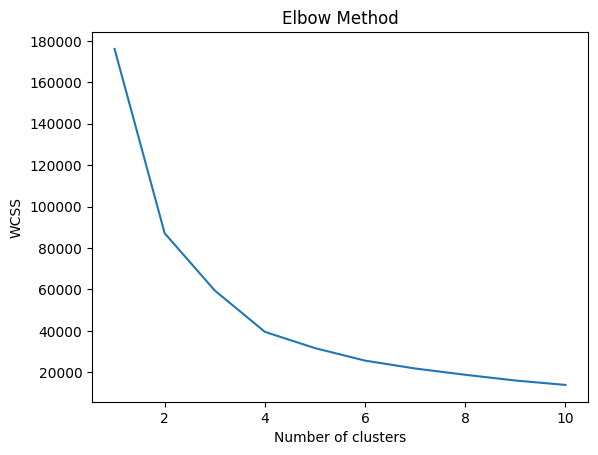

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset file in Google Drive
file_path = '/content/drive/My Drive//DATASET/Mall_Customers.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Selecting features for clustering
X = df.iloc[:, [2, 3]].values  # Using 'Age' and 'Annual Income' features for clustering

# Empty list to store within-cluster sum of squares
wcss = []

# Trying different values of k (number of clusters)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    # Appending the within-cluster sum of squares to the list
    wcss.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()


Prompt : beri kode beri kode untuk membuat klaster sebanyak 5-clusters

In [10]:
# Jumlah cluster
n_clusters = 6

# Menginisialisasi model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Melakukan clustering
clusters = kmeans.fit_predict(X)

# Menambahkan kolom Cluster ke DataFrame
df['Cluster'] = clusters

# Menampilkan hasil cluster
df


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,3
197,198,Male,32,126,74,3
198,199,Male,32,137,18,3


Ploting Result 200 row x 5 coloums

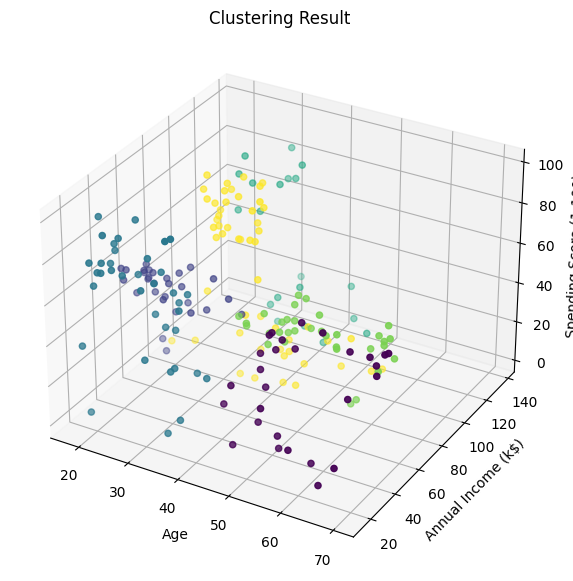

In [11]:
# Visualisasi hasil clustering
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=clusters, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Clustering Result')
plt.show()

Prompt :  beri kode untuk melakukan visualisasi hasil klasterisasi dengan sumbu x adalah Annual Income (k$) dan sumbu y-nya adalah Spending Score (1-100)

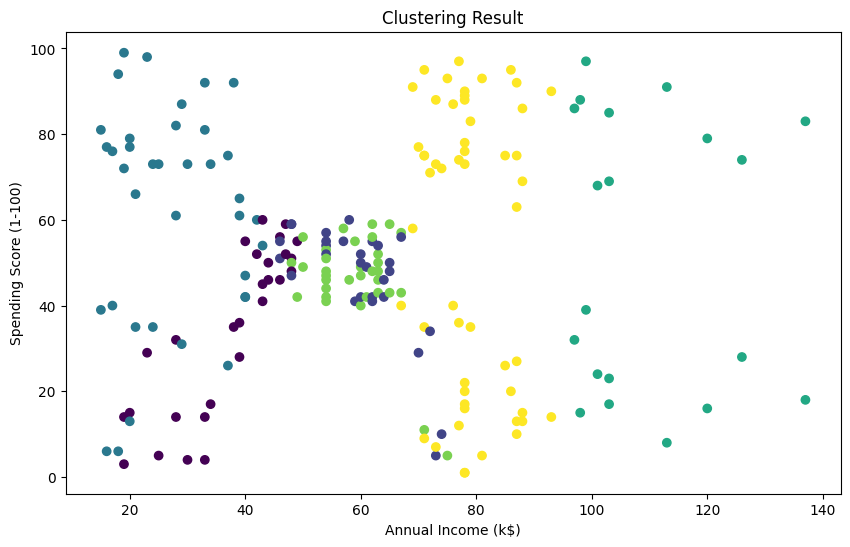

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=clusters, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Result')
plt.show()


**EVALUATING**

Prompt : beri kode untuk melakukan evaluasi k-means

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print("Silhouette Score:", silhouette_avg)

# Menghitung Inertia
inertia_score = kmeans.inertia_
print("Inertia Score:", inertia_score)

Silhouette Score: 0.39293552436103246
Inertia Score: 25643.265320259467
